### Required Library

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,SCORERS
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline


In [2]:
df=pd.read_csv('Regression_StoreSales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
df.isnull().sum()/14204*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [4]:
df.drop(df[df.Item_Outlet_Sales.isnull()].index,axis=0,inplace=True)

In [ ]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(df.corr(),annot=True)

/var/folders/0k/fvxrc6xx287214q6n9hdy0500000gn/T/ipykernel_8321/1909523122.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


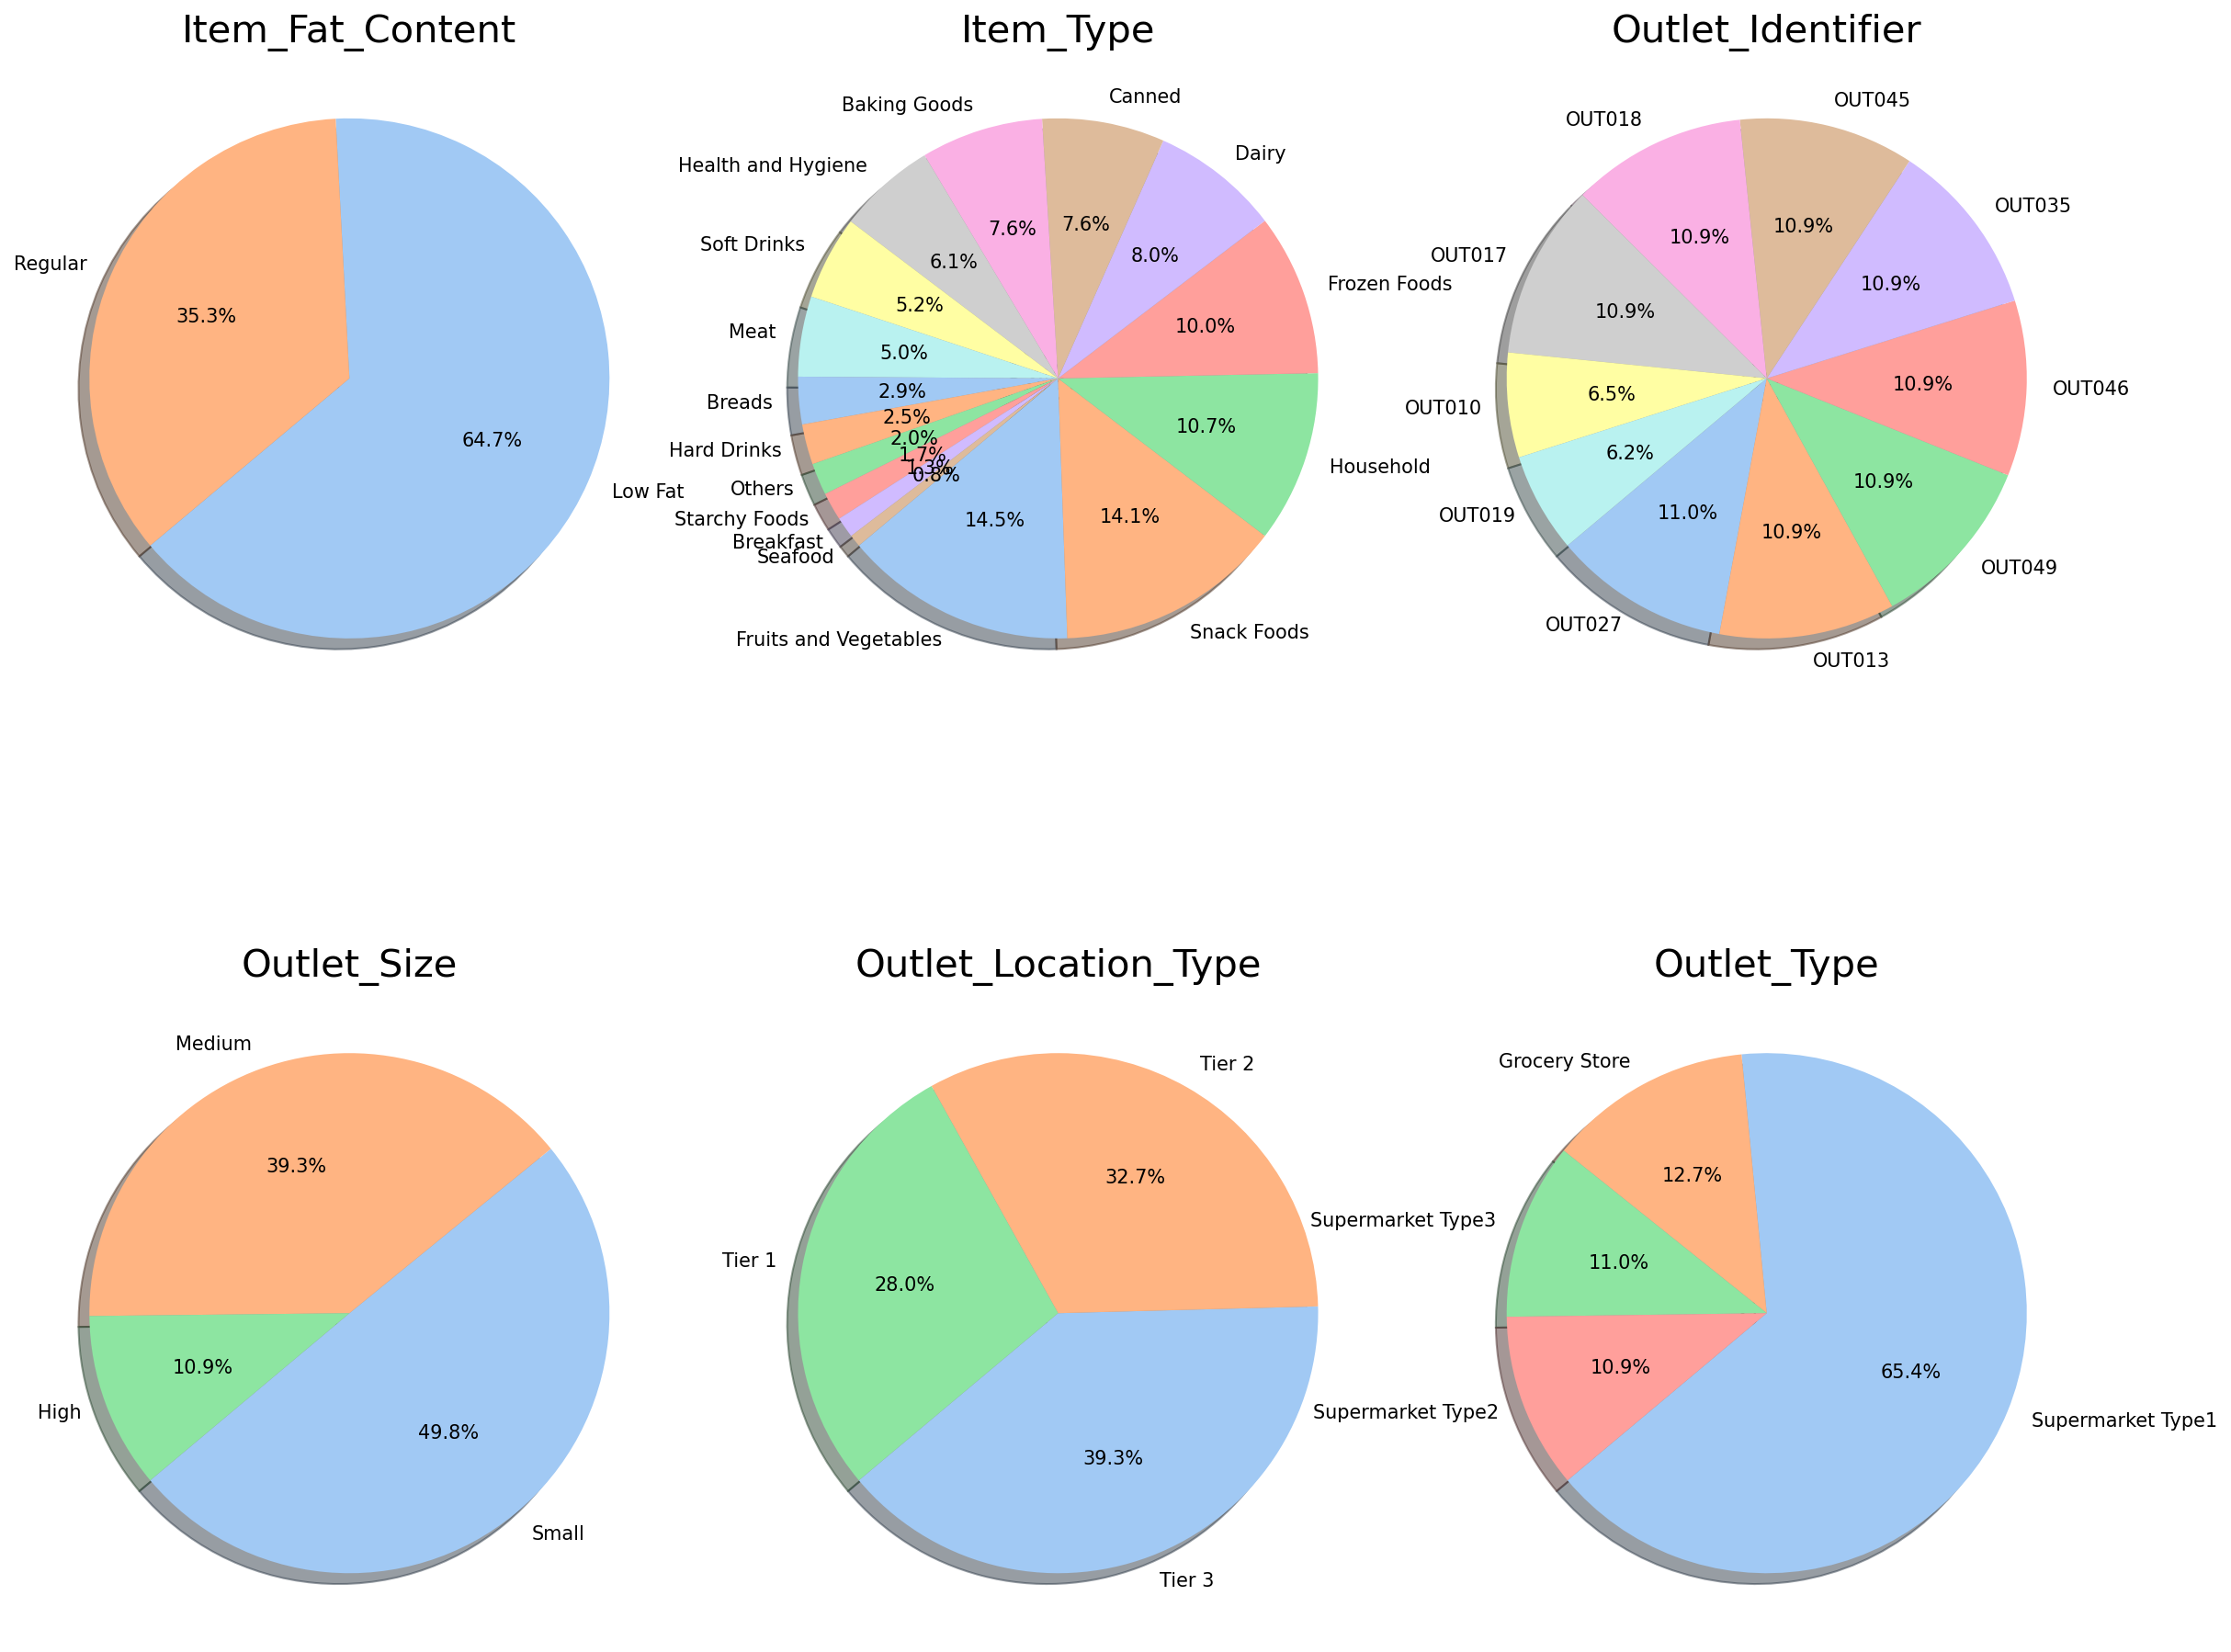

In [94]:
fig , axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True,figsize=(5,1),dpi=150)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
colors = sns.color_palette('pastel')[0:10]
for ax, column in zip(axes.flatten(),['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
      'Outlet_Location_Type' , 'Outlet_Type']): 
    ax.set_title(column,fontsize=20)
    data= df[column].value_counts()
    labels =  data.keys()    #labels = list(data.index)
    #fig.patch.set_facecolor('xkcd:white')
    ax.pie(data,labels =labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=220)
plt.show()

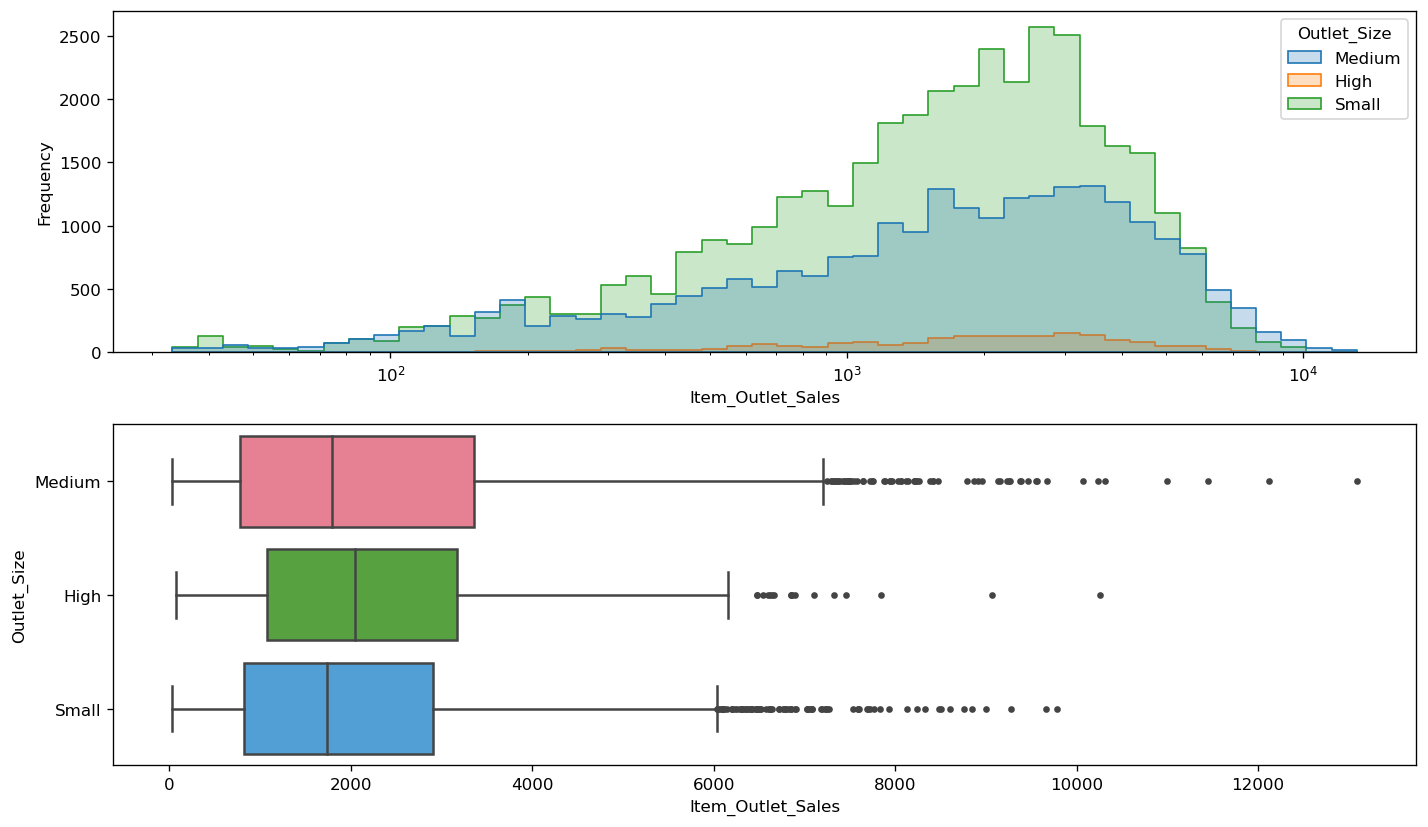

In [106]:
fig, ax = plt.subplots(2,1, figsize= (12, 7),dpi=120)
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
sns.histplot(x=df['Item_Outlet_Sales'],hue =df['Outlet_Size'] ,ax=ax[0],log_scale=True, element='step',stat='frequency')
ax[0].tick_params(axis="x", labelrotation=0)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x=df['Item_Outlet_Sales'], y= df['Outlet_Size'], palette="husl",ax=ax[1],flierprops=flierprops)
#plt.xlim([0,20000]);
plt.tight_layout()

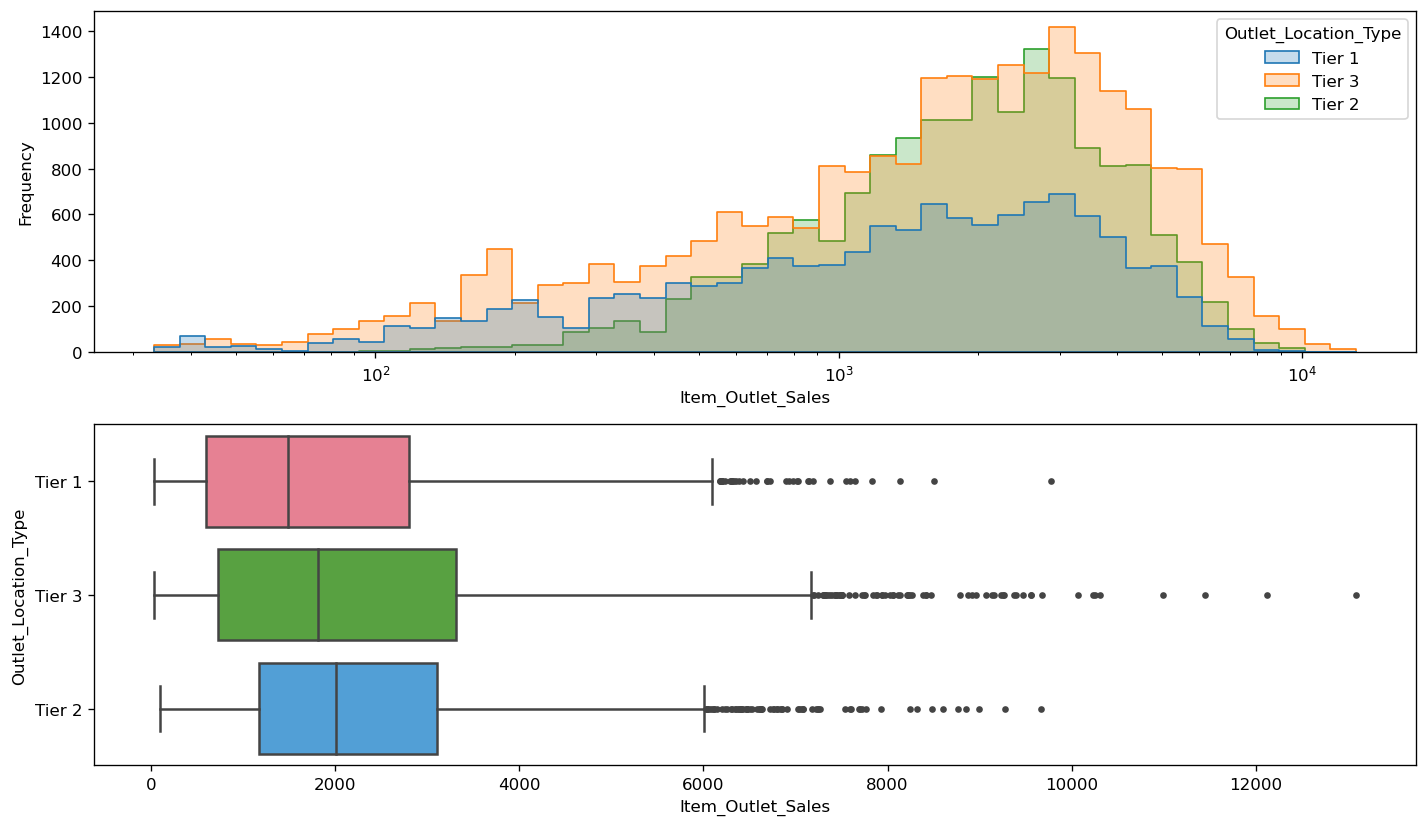

In [105]:
fig, ax = plt.subplots(2,1, figsize= (12, 7),dpi=120)
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
sns.histplot(x=df['Item_Outlet_Sales'],hue =df['Outlet_Location_Type'] ,ax=ax[0],log_scale=True, element='step',stat='frequency')
ax[0].tick_params(axis="x", labelrotation=0)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x=df['Item_Outlet_Sales'], y= df['Outlet_Location_Type'], palette="husl",ax=ax[1],flierprops=flierprops)
#plt.xlim([0,20000]);
plt.tight_layout()

In [5]:
ds=df.copy()

In [6]:
ds.drop('Item_Identifier',axis=1,inplace=True)

In [7]:
ds['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [98]:
for i in ds.select_dtypes(include=object):
    print(i,":",ds[i].unique(),"\n")


Item_Fat_Content : ['Low Fat' 'Regular'] 

Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size : ['Medium' 'High' 'Small'] 

Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



### Models

In [95]:
ds.select_dtypes(exclude=object).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
ds.columns.get_loc('Outlet_Type')

9

In [11]:
trans=make_column_transformer((OrdinalEncoder(),ds.select_dtypes(include=object).columns),remainder='passthrough')


In [12]:
trans.fit_transform(ds)

array([[0.0000000e+00, 4.0000000e+00, 9.0000000e+00, ..., 2.4980920e+02,
        1.9990000e+03, 3.7351380e+03],
       [1.0000000e+00, 1.4000000e+01, 3.0000000e+00, ..., 4.8269200e+01,
        2.0090000e+03, 4.4342280e+02],
       [0.0000000e+00, 1.0000000e+01, 9.0000000e+00, ..., 1.4161800e+02,
        1.9990000e+03, 2.0972700e+03],
       ...,
       [0.0000000e+00, 8.0000000e+00, 6.0000000e+00, ..., 8.5122400e+01,
        2.0040000e+03, 1.1931136e+03],
       [1.0000000e+00, 1.3000000e+01, 3.0000000e+00, ..., 1.0313320e+02,
        2.0090000e+03, 1.8455976e+03],
       [0.0000000e+00, 1.4000000e+01, 8.0000000e+00, ..., 7.5467000e+01,
        1.9970000e+03, 7.6567000e+02]])

In [13]:
pipe_lr=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',LinearRegression())])
pipe_dtr=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',DecisionTreeRegressor(random_state=0))])
pipe_lasso=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',LassoCV(random_state=0))])
pipe_svr=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',SVR())])
pipe_adr=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',AdaBoostRegressor(random_state=0))])
pipe_rfr=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',RandomForestRegressor(random_state=0))])

### SPLITING

In [14]:
x=ds.drop('Item_Outlet_Sales',axis=1)
y=ds['Item_Outlet_Sales']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=0)

### Compairing Models

In [16]:
mod=[pipe_lr,pipe_dtr,pipe_lasso,pipe_svr,pipe_adr,pipe_rfr]
name=['Linear Regression','Decision Tree Regressor','Lasso' ,'SVR','AdaBoostRegressor', 'Random Forest Regressor']
df_score=pd.DataFrame()
for _  in mod:
    _.fit(x_train,y_train)
    ls=[mean_squared_error(y_test,_.predict(x_test)),np.sqrt(mean_squared_error(y_test,_.predict(x_test))),mean_absolute_error(y_test,_.predict(x_test)),round(_.score(x_train,y_train)*100,2),round(r2_score(y_test,_.predict(x_test))*100,2)]
    app=pd.DataFrame(ls)
    df_score=pd.concat([df_score,app],axis=1)
    

In [17]:
df_score.columns=['Linear Regression','Decision Tree Regressor','Lasso' ,'SVR','AdaBoostRegressor', 'Random Forest Regressor']
df_score.index=['MSE','RMSE',"MAE","TrainScore",'R2_Score']
df_score

,Linear Regression,Decision Tree Regressor,Lasso,SVR,AdaBoostRegressor,Random Forest Regressor
MSE,1.445965e+06,2.284365e+06,1.446335e+06,2.819595e+06,1.556716e+06,1.300309e+06
RMSE,1.202483e+03,1.511412e+03,1.202637e+03,1.679165e+03,1.247684e+03,1.140311e+03
MAE,9.160059e+02,1.066164e+03,9.160422e+02,1.264948e+03,1.006351e+03,8.127838e+02
TrainScore,5.013000e+01,1.000000e+02,5.013000e+01,4.090000e+00,4.853000e+01,9.384000e+01
R2_Score,5.060000e+01,2.195000e+01,5.058000e+01,3.660000e+00,4.681000e+01,5.557000e+01


### Predications of Models

In [18]:
df_predict=pd.DataFrame()
for _ in mod:
    _.fit(x_train,y_train)
    app=pd.DataFrame(_.predict(x_test))
    df_predict=pd.concat([df_predict,app],axis=1)

    

In [19]:
df_predict.columns=['Linear Regression','Decision Tree Regressor','Lasso' ,'SVR','AdaBoostRegressor', 'Random Forest Regressor']
df_predict

,Linear Regression,Decision Tree Regressor,Lasso,SVR,AdaBoostRegressor,Random Forest Regressor
0,2356.110522,2059.9852,2367.109042,1857.708333,3018.409680,2558.762612
1,2594.658126,2518.7214,2587.069771,1861.870490,2692.029140,1707.823606
2,1746.222678,3545.3850,1742.265488,1738.997413,2545.366382,2503.041810
3,1870.870513,2681.8424,1870.887705,1754.150091,2545.366382,1936.639092
4,2632.802590,1549.9824,2629.730576,1815.841396,3834.794653,1506.012968
...,...,...,...,...,...,...
1700,2255.721124,1733.7432,2263.293194,1733.601171,2047.914211,1796.734538
1701,1680.960340,219.0482,1682.133675,1670.558432,557.776317,487.532050
1702,3671.295155,3974.8260,3661.666705,1861.022296,4799.603012,4652.390686
1703,-305.799915,107.8596,-298.596835,1496.684892,1099.443897,164.425968


### HyperParameter Tuning

In [20]:
pipe=Pipeline([('transform',trans),('scale',MinMaxScaler()),('clf',LinearRegression())])
grid_param=[
        {
            "clf":[DecisionTreeRegressor()],
            "clf__splitter":["random"],
            "clf__max_depth" : [7],
            "clf__min_samples_leaf":[4],
            "clf__min_weight_fraction_leaf":[0.1]
        },
        {
            "clf":[LassoCV()]
        },
        {
            "clf":[SVR()],
            "clf__kernel":['poly']
        },
        {
            "clf":[AdaBoostRegressor()],
            "clf__random_state":[1],
            "clf__n_estimators":[400],
            'clf__learning_rate':[0.01]
        },
        {
            'clf':[RandomForestRegressor()],
            'clf__random_state':[1],
            'clf__n_estimators':  [200],
            'clf__max_features':  ['sqrt'],
            'clf__max_depth': [10] ,
            'clf__min_samples_split': [10],
            'clf__min_samples_leaf': [4],
        }          
        ]

In [21]:
grid=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model=grid.fit(x_train,y_train)

In [22]:
print(best_model.best_estimator_)
best_model.score(x_test,y_test)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))])),
                ('scale', MinMaxScaler()),
                ('clf',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=10,
                                       n_estimators=200, random_state=1))])


0.595626162144908

### Stacking 

In [23]:
from sklearn.ensemble import StackingRegressor
estimators = [
('Decision Tree Regressor',pipe_dtr.set_params(clf__splitter="random",clf__max_depth = 7,clf__min_samples_leaf=4,clf__min_weight_fraction_leaf=0.1)),
('SVR',pipe_svr.set_params(clf__kernel='poly')),
('AdaBoostRegressor',pipe_adr.set_params( clf__random_state=1,clf__n_estimators=400,clf__learning_rate=0.01)),
('Random Forest Regressor',pipe_rfr.set_params(clf__random_state=1,clf__n_estimators=200,clf__max_features='sqrt',clf__max_depth=10 ,clf__min_samples_split=10,clf__min_samples_leaf=4))
]
stack=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),cv=5)

In [42]:
print("Stacking: ",round(np.mean(cross_val_score(stack,x_train,y_train,scoring='r2', cv=5, n_jobs=-1))*100,4))

Stacking:  59.5167


### Final model Comparations

In [44]:
random_forest=pipe_rfr.set_params(clf__random_state=1,clf__n_estimators=200,clf__max_features='sqrt',clf__max_depth=10 ,clf__min_samples_split=10,clf__min_samples_leaf=4)
pd.DataFrame({'Random Forest Regressor':[mean_squared_error(y_test,random_forest.predict(x_test)),np.sqrt(mean_squared_error(y_test,random_forest.predict(x_test))),mean_absolute_error(y_test,random_forest.predict(x_test)),round(random_forest.score(x_train,y_train)*100,2),round(r2_score(y_test,random_forest.predict(x_test))*100,2)]},index=['MSE','RMSE',"MAE","TrainScore",'R2_Score'])


,Random Forest Regressor
MSE,1.300309e+06
RMSE,1.140311e+03
MAE,8.127838e+02
TrainScore,9.384000e+01
R2_Score,5.557000e+01


In [73]:
df_stack_score=pd.DataFrame({'Stacking':[round(np.mean(cross_val_score(stack,x,y,scoring='neg_mean_squared_error', cv=5, n_jobs=-1))*-100,4),
round(np.mean(cross_val_score(stack,x,y,scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1))*-100,4),
round(np.mean(cross_val_score(stack,x,y,scoring='neg_mean_absolute_error', cv=5, n_jobs=-1))*-100,4),
round(np.mean(cross_val_score(stack,x,y,scoring='r2', cv=5, n_jobs=-1))*100,4)]},index=['MSE','RMSE',"MAE",'R2_Score'])

In [80]:
stack_predict=cross_val_predict(stack,x_test,y_test, cv=5, n_jobs=-1)

In [77]:
stack_predict

array([2939.86648784,  938.32826902,  940.32716342, ..., 1346.95089809,
       1960.03202261, 3358.42046987])

In [38]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [62]:
for i,j in df_score['Linear Regression'].items():
    print(i,j)

MSE 1445964.8995263102
RMSE 1202.4828063329264
MAE 916.0059485324107
TrainScore 50.13
R2_Score 50.6


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

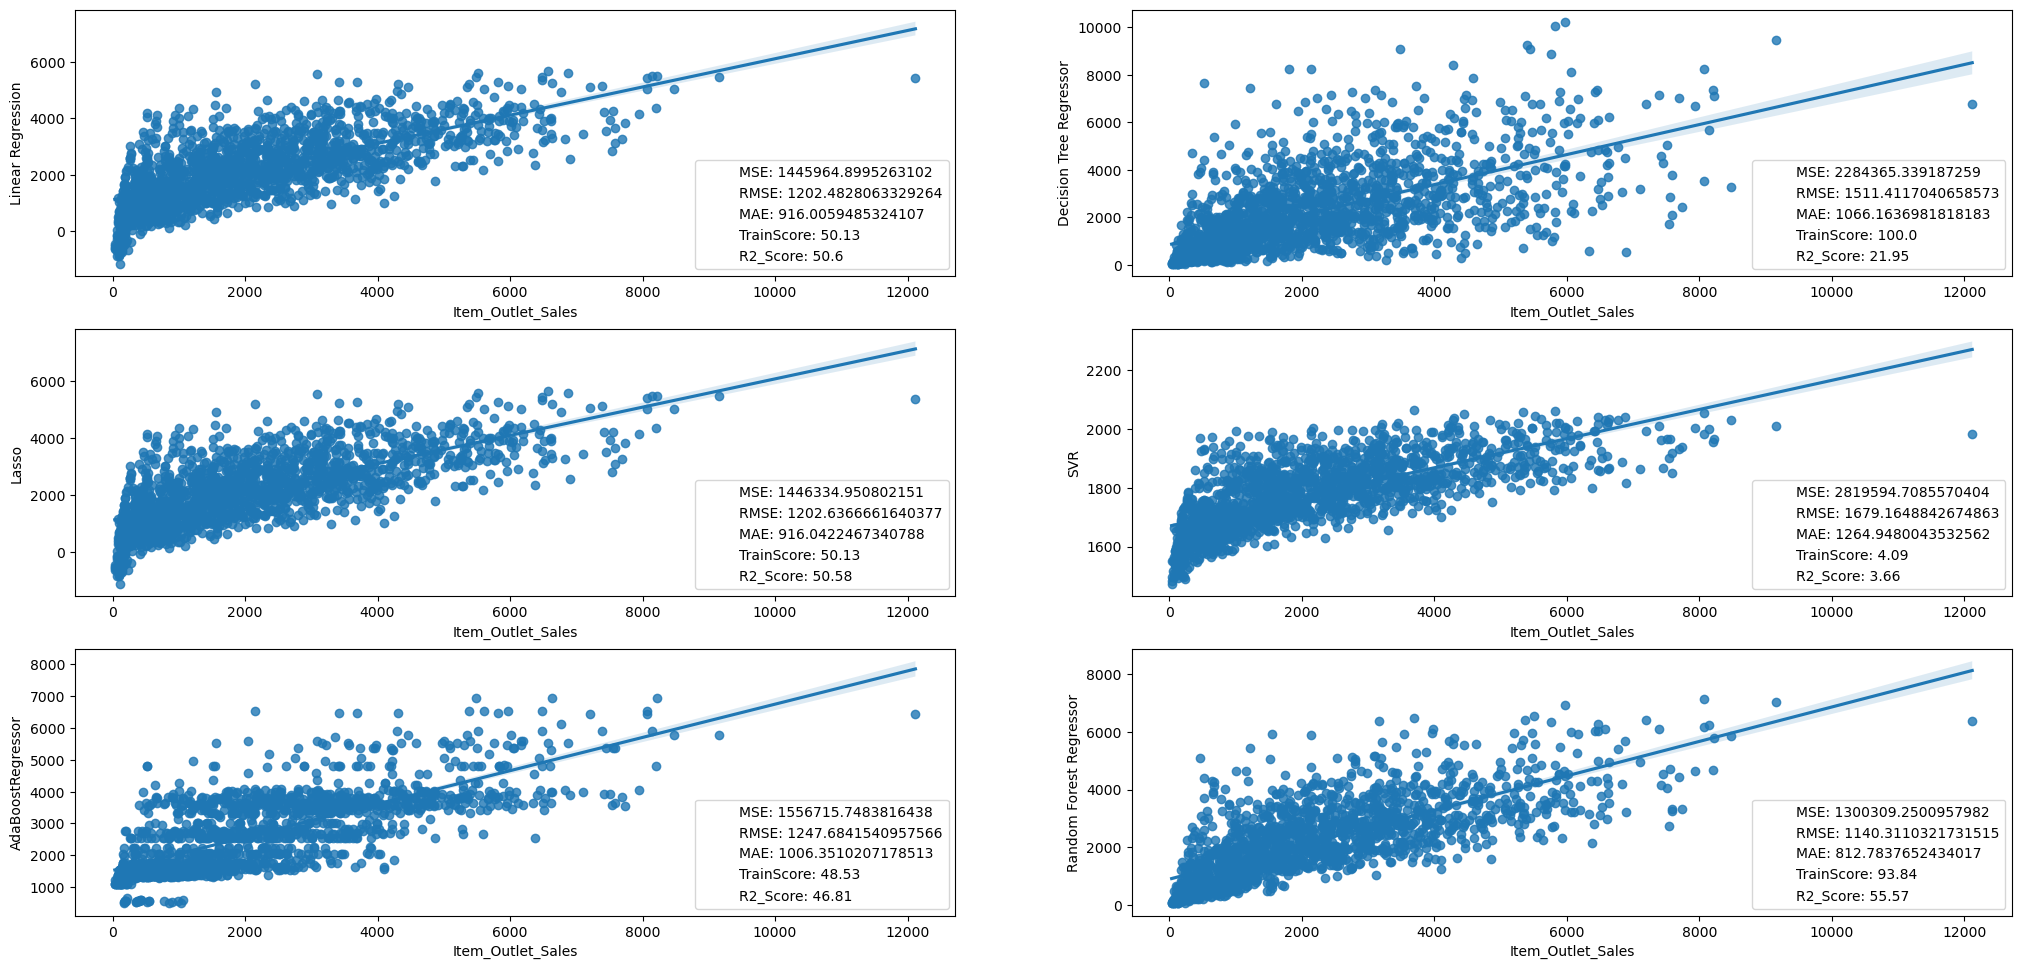

In [72]:
fig,ax=plt.subplots(3,2,figsize=(25,12),dpi=100)
for i,j in zip(df_predict.columns,ax.flatten()):
    sns.regplot(y_test,df_predict[i],ax=j);
    for name, score in df_score[i].items():
        j.plot([], [], " ", label=f"{name}: {score}")
        j.legend(loc="lower right")


In [107]:
df_stack_score

,Stacking
MSE,1.177078e+08
RMSE,1.084890e+05
MAE,7.628873e+04
R2_Score,5.950980e+01


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


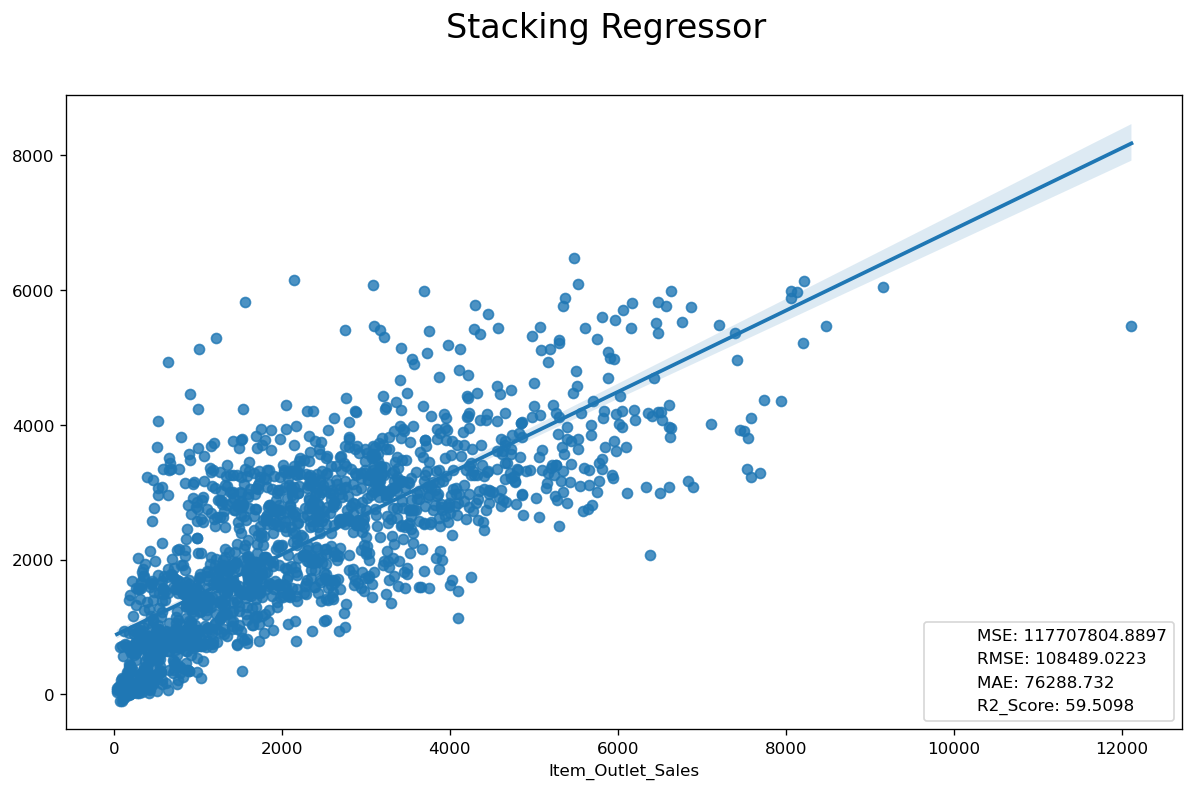

In [108]:
plt.figure(figsize=(12,7),dpi=120)
plt.suptitle('Stacking Regressor',size=20)
sns.regplot(y_test,stack_predict)
for name, score in df_stack_score['Stacking'].items():
        plt.plot([], [], " ", label=f"{name}: {score}")
        plt.legend(loc="lower right")



In [151]:
pipe_rfr.predict(x_test.loc[[4931]])

array([2558.762612])

In [139]:
nan=pd.read_csv('Regression_StoreSales.csv')

In [148]:
nan=nan[nan.Item_Outlet_Sales.isnull()]
print(nan.shape)
nan.head()

(5681, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [152]:
nan.index==8523

array([ True, False, False, ..., False, False, False])

In [155]:
for i in nan.index:
    nan.loc[nan.index==i,'Item_Outlet_Sales']=pipe_rfr.predict(nan.loc[[i]])


In [159]:

exl=pd.ExcelWriter('Null_Predicted.xlsx')
nan.to_excel(exl)
exl.save()
nan.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1631.170052
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1227.681936
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,678.723178
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2438.139626
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6433.472266
